In [1]:
import seaborn as sns
import pydose3d
import pandas as pd
import pydose3d.data as data
from pydose3d.svc.ntuple_data import NTupleDataSvc
from pydose3d.svc.dose3d import Dose3DSvc
NTupleDataSvc.ImplicitMT = True
pydose3d.set_log_level("INFO")

Welcome to JupyROOT 6.28/00


In [3]:
data_path = f"/mnt/e/Data/dose3d/mc/d3d/analysis/vary_cell_size" # Bartek AGH PC 
cell54 = f"{data_path}/water_env_d3d_top_centred_5.4mm_1x1x20_1e7.root"
cell104 = f"{data_path}/water_env_d3d_top_centred_10.4mm_1x1x20_1e7.root"
d3dsvc = Dose3DSvc()

In [3]:
d3dsvc.set_data(cell54,"Dose3DTTree")
df54 = d3dsvc.get_edeposit_profile_z_pdframe(layer=0,col=0,scoring='Cell',normalized=True)
df54['cell size'] = 5.4
print(df54)

    CellIdZ  CellPosZ  EDeposit  cell size
0         0       3.7  0.671559        5.4
1         1      11.1  1.000000        5.4
2         2      18.5  0.814269        5.4
3         3      25.9  0.906648        5.4
4         4      33.3  0.771898        5.4
5         5      40.7  0.727897        5.4
6         6      48.1  0.810194        5.4
7         7      55.5  0.795888        5.4
8         8      62.9  0.617887        5.4
9         9      70.3  0.634671        5.4
10       10      77.7  0.710467        5.4
11       11      85.1  0.559659        5.4
12       12      92.5  0.504406        5.4
13       13      99.9  0.560702        5.4
14       14     107.3  0.571718        5.4
15       15     114.7  0.473177        5.4
16       16     122.1  0.469420        5.4
17       17     129.5  0.316905        5.4
18       18     136.9  0.424314        5.4
19       19     144.3  0.387345        5.4


In [ ]:
d3dsvc.set_data(cell104,"Dose3DTTree")
df104 = d3dsvc.get_edeposit_profile_z_pdframe(layer=0,col=0,scoring='Cell',normalized=True)
df104['cell size'] = 10.4
print(df104)

<Axes: xlabel='CellPosZ', ylabel='EDeposit'>

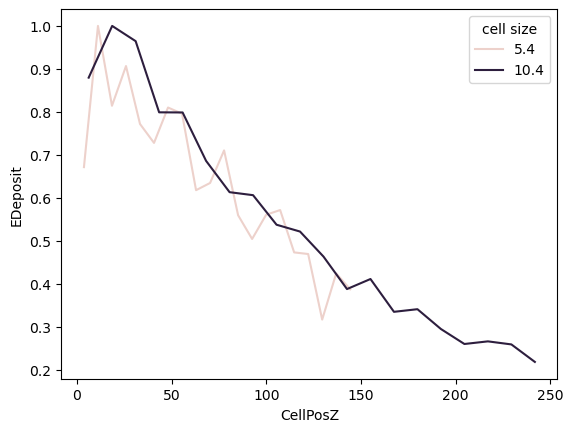

In [13]:
pdd = pd.concat([df54, df104], ignore_index=True) 
sns.lineplot(data=pdd,x='CellPosZ',y='EDeposit',hue='cell size')

In [56]:
cell_size_centred = [3.4,5.4,7.4,10.4]
df_cell_edep = pd.DataFrame()
for size in cell_size_centred:
    file = f"{data_path}/water_env_d3d_centred_{size}mm_1x1x1_1e8.root"
    d3dsvc.set_data(file,"Dose3DTTree")
    edep = d3dsvc.get_cell_edeposit(layer=0,col=0,row=0) #/ size*size*size
    df_cell_edep = pd.concat([df_cell_edep,pd.DataFrame({"Allign":[f"top centred"], "Cell size":[size], "Edep":[edep]})], ignore_index=True)
print(df_cell_edep)

        Allign  Cell size          Edep
0  top centred        3.4  5.190440e+05
1  top centred        5.4  2.203140e+06
2  top centred        7.4  5.381233e+06
3  top centred       10.4  1.548855e+07


In [57]:
cell_size_top_centred = [3.4,4.4,5.4,6.4,7.4,8.4,9.4,10.4]
for size in cell_size_top_centred:
    file = f"{data_path}/water_env_d3d_top_centred_{size}mm_1x1x1_1e8.root"
    d3dsvc.set_data(file,"Dose3DTTree")
    edep = d3dsvc.get_cell_edeposit(layer=0,col=0,row=0) #/ size*size*size
    #df_cell_edep = pd.concat([df_cell_edep,pd.DataFrame({"Cell size":[size], "Edep":[edep]})], ignore_index=True)
    df_cell_edep = pd.concat([df_cell_edep,pd.DataFrame({"Allign":[f"centred"], "Cell size":[size], "Edep":[edep]})], ignore_index=True)
    
print(df_cell_edep)

         Allign  Cell size          Edep
0   top centred        3.4  5.190440e+05
1   top centred        5.4  2.203140e+06
2   top centred        7.4  5.381233e+06
3   top centred       10.4  1.548855e+07
4       centred        3.4  4.820624e+05
5       centred        4.4  1.130433e+06
6       centred        5.4  1.481858e+06
7       centred        6.4  2.561479e+06
8       centred        7.4  3.924083e+06
9       centred        8.4  5.628436e+06
10      centred        9.4  7.561567e+06
11      centred       10.4  1.040947e+07


<Axes: xlabel='Cell size [mm]', ylabel='Edep'>

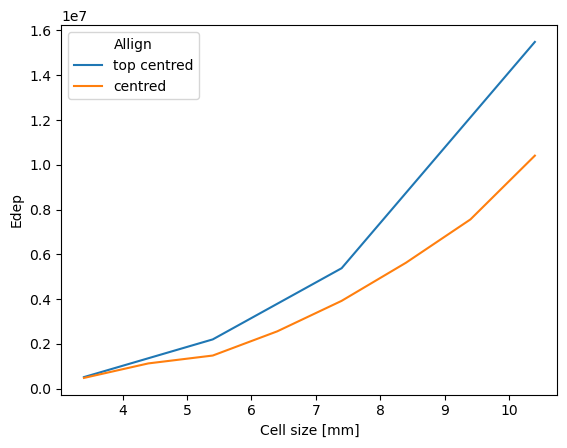

In [59]:
# df_cell_edep["Edep"] = df_cell_edep["Edep"] / df_cell_edep["Edep"].max()
df_cell_edep.rename(columns={f"Cell size":"Cell size [mm]"},inplace=True)
sns.lineplot(data=df_cell_edep,y='Edep',x='Cell size [mm]',hue="Allign")